In [2]:
import numpy as np
from functools import partial
import matplotlib.pyplot as plt 


In [5]:
# Using U(q) = 1/2 q^2
# grad U (stochastic) = q + N(0,4) gaussian noise

def gradient_noise(q):
    # just -q since derivative is q
    grad = q + np.random.randn(1)
    return grad

def hmc_noise(q0,p0,h):
    # n is the size of the batch
    q = q0
    p = p0
    
    grad = gradient_noise(q)
    
    #added_noise = np.random.multivariate_normal(np.zeros(3), 2*h*B, 1)
    
    p = p - h*grad
    q = q + h*p
    
    return q, p

def hmc_friction(q0,p0,h):
    # n is the size of the batch
    q = q0
    p = p0
    
    grad = gradient_noise(q)
    cov = 1 # probably unnecessary
    
    p = p - h*grad - h*p
    q = q + h*p
    
    return q, p


def run_simulation( q0,p0, Nsteps, h, step_function):
    
    q_traj = [np.copy(q0)] 
    p_traj = [np.copy(p0)]
    t_traj = [0]

    q = np.copy(q0) 
    p = np.copy(p0)
    t = 0 
    for n in range(Nsteps):
        q,p = step_function(q,p,h)
        t = t + h 

        q_traj += [q] 
        p_traj += [p]   
        t_traj += [t]

    q_traj = np.array(q_traj, dtype=object) 
    p_traj = np.array(p_traj, dtype=object) 
    t_traj = np.array(t_traj, dtype=object) 

    return q_traj, p_traj, t_traj

def run_simulation_resample( q0,p0, Nsteps, h, step_function,numResample):
    
    resample = False
    # numResample is the interval at which we should resample p
    q_traj = [np.copy(q0)] 
    p_traj = [np.copy(p0)]
    t_traj = [0]

    q = np.copy(q0) 
    p = np.copy(p0)
    t = 0 
    for n in range(Nsteps):
        if (n % numResample) == 0:
            resample = True
        else:
            resample = False
        if (resample):
            p = np.random.randn(1)
            
        q,p = step_function(q,p,h)
        t = t + h 

        q_traj += [q] 
        p_traj += [p]   
        t_traj += [t]

    q_traj = np.array(q_traj, dtype=object) 
    p_traj = np.array(p_traj, dtype=object) 
    t_traj = np.array(t_traj, dtype=object) 

    return q_traj, p_traj, t_traj


    

In [6]:
Nsteps = 15000
h = 0.1

q0 = 0
p0 = 0

# Run one long trajectory of Nsteps, 
q_traj, p_traj, t_traj = run_simulation(q0, p0, Nsteps , h, hmc_noise)


# Run trajectory using resampling of p every 50 steps
q_traj2, p_traj2, t_traj2 = run_simulation_resample(q0, p0, Nsteps , h, hmc_noise, 50)


# run trajectory using friction (cov = 1)
q_traj3, p_traj3, t_traj3 = run_simulation(q0, p0, Nsteps , h, hmc_friction)


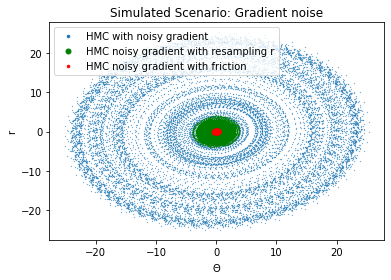

In [10]:
plt.plot(q_traj,p_traj,'.', markersize=.5, label='HMC with noisy gradient')
plt.plot(q_traj2,p_traj2,'o', markersize=.5, label='HMC noisy gradient with resampling r', color="green")
plt.plot(q_traj3,p_traj3,'.',markersize=.5, label='HMC noisy gradient with friction', color="red")
plt.xlabel('$ \Theta $')
plt.ylabel('r')
plt.legend(markerscale=10)
plt.title('Simulated Scenario: Gradient noise')
plt.savefig("figure2.png")
plt.show()